In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Crime_in_California', header=0)
len(dfs)

4

In [4]:
data = dfs[1]
data

,Year,Population,Index,Violent,Property,Murder,Rape[5],Robbery,Aggravated assault,Burglary,Larcenytheft,Vehicletheft
0,1960,15717204,546069,37558,508511,616,2859,18796,18796,143102,311956,53453
1,1970,19953134,1264854,94741,1170113,1376,7005,45083,45083,349788,682811,137514
2,1980,23532680,1264854,210290,1633042,3411,13693,102766,102766,545138,913070,174834
3,1990,29760021,1965237,311051,1654186,3553,12688,182602,182602,400392,951580,302214
4,2000,33871648,1266714,210531,1056183,2079,9785,60249,138418,222293,651855,182035
5,2010,37338198,1146072,164133,981939,1809,8331,58116,95877,228857,600558,152524
6,2016,39250017,1176866,174796,1002070,1930,10149,54789,104375,188304,637010,176756
7,2017,39613045,1173972,178553,986769,1829,14724,56609,105391,176638,641804,168327
8,2018,39825181,1126387,176866,940998,1739,15500,54312,105315,164540,621288,155170
9,2019,39959095,1096668,173205,915197,1679,14720,52050,104756,151596,622869,140732


In [5]:
# 1. missing values

data.isnull()

,Year,Population,Index,Violent,Property,Murder,Rape[5],Robbery,Aggravated assault,Burglary,Larcenytheft,Vehicletheft
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# no missing values

In [7]:
# 2. Identify outliers

data1 = data.drop(['Population'], axis=1)
data1

,Year,Index,Violent,Property,Murder,Rape[5],Robbery,Aggravated assault,Burglary,Larcenytheft,Vehicletheft
0,1960,546069,37558,508511,616,2859,18796,18796,143102,311956,53453
1,1970,1264854,94741,1170113,1376,7005,45083,45083,349788,682811,137514
2,1980,1264854,210290,1633042,3411,13693,102766,102766,545138,913070,174834
3,1990,1965237,311051,1654186,3553,12688,182602,182602,400392,951580,302214
4,2000,1266714,210531,1056183,2079,9785,60249,138418,222293,651855,182035
5,2010,1146072,164133,981939,1809,8331,58116,95877,228857,600558,152524
6,2016,1176866,174796,1002070,1930,10149,54789,104375,188304,637010,176756
7,2017,1173972,178553,986769,1829,14724,56609,105391,176638,641804,168327
8,2018,1126387,176866,940998,1739,15500,54312,105315,164540,621288,155170
9,2019,1096668,173205,915197,1679,14720,52050,104756,151596,622869,140732


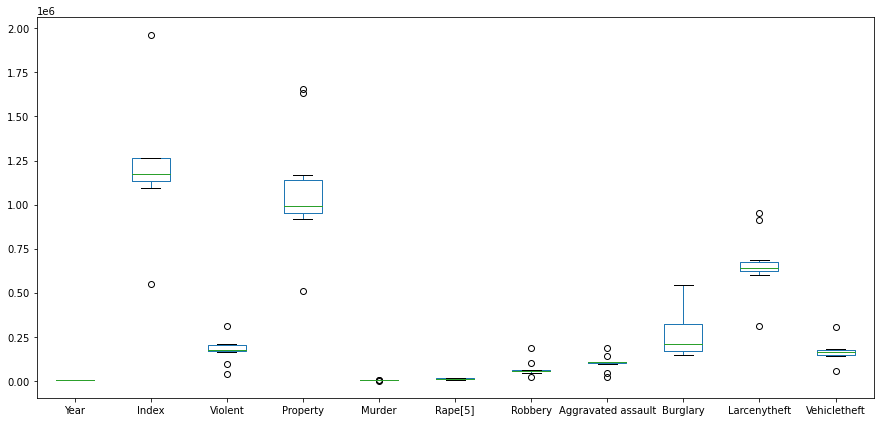

In [11]:
plt.rcParams['figure.figsize'] = (15, 7)
data1.plot.box()

In [12]:
# population was excluded from this analysis because it skewed the entire dataset. without it, we are able to clearly
# see the outliers

In [13]:
# 3. duplicate values

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [14]:
# no duplicated data

In [15]:
# 4. replace headers

list(data.columns) # gives list of currently used column names

['Year',
 'Population',
 'Index',
 'Violent',
 'Property',
 'Murder',
 'Rape[5]',
 'Robbery',
 'Aggravated assault',
 'Burglary',
 'Larcenytheft',
 'Vehicletheft']

In [16]:
data = data.rename(columns={'Rape[5]': 'Rape', 'Aggravated assault': 'AggravatedAssault', 'Larcenytheft': 'LarcenyTheft',
            'Vehicletheft': 'VehicleTheft'})
# renames oddly named columns
data.head()

,Year,Population,Index,Violent,Property,Murder,Rape,Robbery,AggravatedAssault,Burglary,LarcenyTheft,VehicleTheft
0,1960,15717204,546069,37558,508511,616,2859,18796,18796,143102,311956,53453
1,1970,19953134,1264854,94741,1170113,1376,7005,45083,45083,349788,682811,137514
2,1980,23532680,1264854,210290,1633042,3411,13693,102766,102766,545138,913070,174834
3,1990,29760021,1965237,311051,1654186,3553,12688,182602,182602,400392,951580,302214
4,2000,33871648,1266714,210531,1056183,2079,9785,60249,138418,222293,651855,182035


In [17]:
# 5. check data type

data.dtypes

Year                 int64
Population           int64
Index                int64
Violent              int64
Property             int64
Murder               int64
Rape                 int64
Robbery              int64
AggravatedAssault    int64
Burglary             int64
LarcenyTheft         int64
VehicleTheft         int64
dtype: object

In [18]:
# many data cleaning steps do not apply since these are all integers. no casing and no fuzzy matching because these
# are all integers, while those cleaning functions require strings. data is also in readable format, so no need to fix
# that. this is a very clean dataset

In [19]:
data.to_csv('Milestone3.csv')